In [92]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import pickle
import matplotlib.pyplot as plt

In [109]:
data = pd.read_csv('../data/LLCP_agg_cleaned.csv')

In [111]:
data['CVDCRHD4'].value_counts()

0.0    2006774
1.0     120430
Name: CVDCRHD4, dtype: int64

In [112]:
std_scaler = StandardScaler()
X = data.drop('CVDCRHD4', axis=1)
y = data['CVDCRHD4']
print(X.columns, X.shape)

X = std_scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Index(['GenHealth', 'ASTHMA3', 'EXERANY2', 'CHCSCNCR', '_BMI5CAT', '_SMOKER3',
       'DRNKANY5', '_AGEG5YR', 'Race_1.0', 'Race_2.0', 'Race_3.0', 'Race_4.0',
       'Race_5.0', 'Race_6.0', 'Kidney', 'Bronchitis', 'Depression',
       'Diabetes', 'Sex', 'Heart Attack', 'Cholesterol', 'Stroke',
       'Told Cholesterol High', 'Arthritis'],
      dtype='object') (2127204, 24)


In [98]:
counts = y_train.value_counts()
print(counts)
scale_pos_weight = counts[0] / counts[1]

0.0    1605519
1.0      96244
Name: CVDCRHD4, dtype: int64


In [105]:
model = XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=42, colsample_bytree=0.8, colsample_bylevel=0.8, colsample_bynode=0.8, eta=0.2, eval_metric='aucpr')
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=0.8, colsample_bynode=0.8, colsample_bytree=0.8,
              early_stopping_rounds=None, enable_categorical=False, eta=0.2,
              eval_metric='aucpr', gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.200000003, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=0.5,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=42,
              reg_alpha=0, ...)

Text(0.5, 1.0, 'Feature Importance')

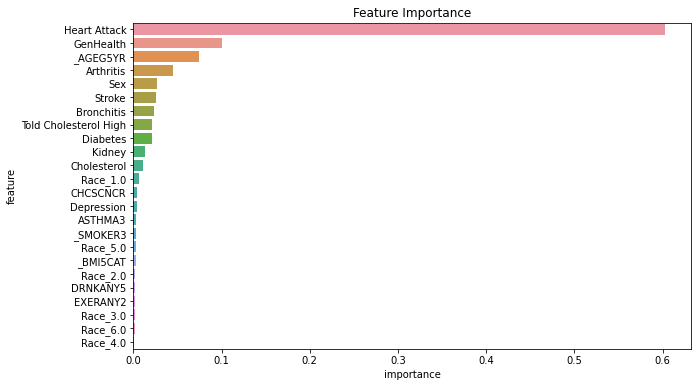

In [106]:
# feature importance
feature_importance = pd.DataFrame({'feature': data.drop(['CVDCRHD4'], axis=1).columns, 'importance': model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)
# plot
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')

In [107]:
preds = model.predict(X_test)
print(accuracy_score(y_test, preds))
print(classification_report(y_test, preds))

0.81080337814174
              precision    recall  f1-score   support

         0.0       0.99      0.81      0.89    401255
         1.0       0.21      0.82      0.33     24186

    accuracy                           0.81    425441
   macro avg       0.60      0.81      0.61    425441
weighted avg       0.94      0.81      0.86    425441



In [102]:
# save model
pickle.dump(std_scaler, open('../models/std_scaler.pkl', 'wb'))
pickle.dump(model, open('../models/xgb_model.pkl', 'wb'))